In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


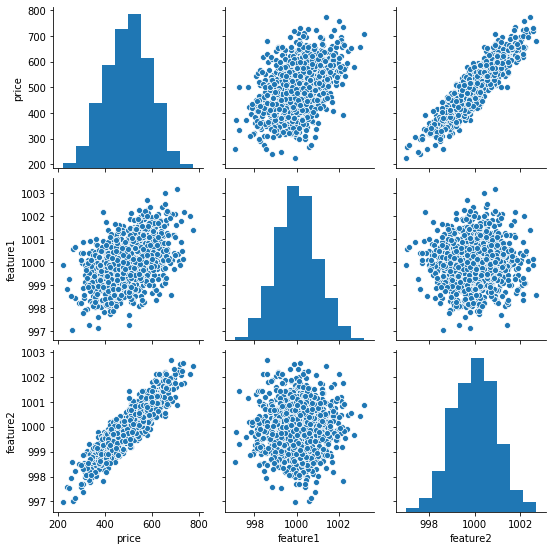

In [4]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mms = MinMaxScaler()

In [16]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [17]:
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = mms.transform(X_train)

In [20]:
X_test = mms.transform(X_test)

In [25]:
X_test.max()

1.0186515935232023

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: if the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |      # as first layer in a sequential mod

In [35]:
model = Sequential([Dense(4, activation='relu'), 
                   Dense(4, activation='relu'),
                   Dense(4, activation='relu'),
                   Dense(1)])

In [36]:
model.compile(optimizer='rmsprop', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [37]:
model.fit(X_train, y_train, epochs=250)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/250
700/700 [==============================] - 1s 767us/sample - loss: 256695.6980
Epoch 2/250
700/700 [==============================] - 0s 60us/sample - loss: 256649.6780
Epoch 3/250
700/700 [==============================] - 0s 63us/sample - loss: 256603.9721
Epoch 4/250
700/700 [==============================] - 0s 57us/sample - loss: 256553.8493
Epoch 5/250
700/700 [==============================] - 0s 46us/sample - loss: 256498.4823
Epoch 6/250
700/700 [==============================] - 0s 51us/sample - loss: 256437.4429
Epoch 7/250
700/700 [==============================] - 0s 52us/sample - loss: 256369.9148
Epoch 8/250
700/700 [==============================] - 0s 74us/sample - loss: 256295.8551
Epoch 9/250
700/700 [==============================] - 0s 54us/sample - loss: 256214.0695
Epoch 10/250
700/700 [==============================] - 0s 61us/sample - loss: 256124.2537
Ep

700/700 [==============================] - 0s 37us/sample - loss: 119169.9480
Epoch 86/250
700/700 [==============================] - 0s 41us/sample - loss: 114549.1203
Epoch 87/250
700/700 [==============================] - 0s 40us/sample - loss: 109956.7196
Epoch 88/250
700/700 [==============================] - 0s 38us/sample - loss: 105263.9653
Epoch 89/250
700/700 [==============================] - 0s 37us/sample - loss: 100554.6208
Epoch 90/250
700/700 [==============================] - 0s 42us/sample - loss: 95855.1977
Epoch 91/250
700/700 [==============================] - 0s 38us/sample - loss: 91086.6681
Epoch 92/250
700/700 [==============================] - 0s 37us/sample - loss: 86305.3260
Epoch 93/250
700/700 [==============================] - 0s 43us/sample - loss: 81551.2021
Epoch 94/250
700/700 [==============================] - 0s 46us/sample - loss: 76799.5313
Epoch 95/250
700/700 [==============================] - 0s 45us/sample - loss: 72071.7505
Epoch 96/250
700/7

700/700 [==============================] - 0s 64us/sample - loss: 752.3712
Epoch 177/250
700/700 [==============================] - 0s 100us/sample - loss: 734.9655
Epoch 178/250
700/700 [==============================] - 0s 72us/sample - loss: 716.7821
Epoch 179/250
700/700 [==============================] - 0s 44us/sample - loss: 700.2839
Epoch 180/250
700/700 [==============================] - 0s 44us/sample - loss: 684.2269
Epoch 181/250
700/700 [==============================] - 0s 45us/sample - loss: 665.3830
Epoch 182/250
700/700 [==============================] - 0s 44us/sample - loss: 649.7133
Epoch 183/250
700/700 [==============================] - 0s 41us/sample - loss: 631.7995
Epoch 184/250
700/700 [==============================] - 0s 36us/sample - loss: 614.9103
Epoch 185/250
700/700 [==============================] - 0s 36us/sample - loss: 598.2832
Epoch 186/250
700/700 [==============================] - 0s 46us/sample - loss: 579.9233
Epoch 187/250
700/700 [===========

In [38]:
loss = pd.DataFrame(model.history.history)

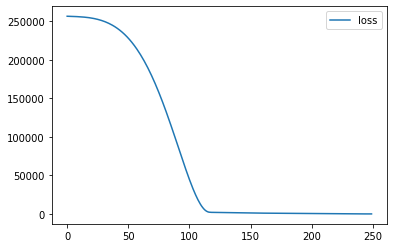

In [39]:
loss.plot()

In [40]:
#  Evaluate with test data

In [73]:
model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 40us/sample - loss: 28.9447


28.944741821289064

In [75]:
model.evaluate(X_train,y_train, verbose=0)

27.570150517054966

In [43]:
test_predict = model.predict(X_test)

In [57]:
test_predict

0      407.726105
1      622.041382
2      590.856934
3      572.435791
4      371.247650
          ...    
295    529.918518
296    518.228638
297    608.233948
298    418.477356
299    413.784943
Length: 300, dtype: float32

In [58]:
test_predict = pd.Series(test_predict.reshape(300,))

AttributeError: 'Series' object has no attribute 'reshape'

In [59]:
test_predict

0      407.726105
1      622.041382
2      590.856934
3      572.435791
4      371.247650
          ...    
295    529.918518
296    518.228638
297    608.233948
298    418.477356
299    413.784943
Length: 300, dtype: float32

In [61]:
pred = pd.DataFrame(y_test, columns=['True Y'])

In [62]:
pred = pd.concat([pred_df, test_predict], axis=1)

In [65]:
pred

,True Y,Model Prediction
0,402.296319,407.726105
1,624.156198,622.041382
2,582.455066,590.856934
3,578.588606,572.435791
4,371.224104,371.247650
...,...,...
295,525.704657,529.918518
296,502.909473,518.228638
297,612.727910,608.233948
298,417.569725,418.477356


In [64]:
pred.columns = ['True Y', 'Model Prediction']

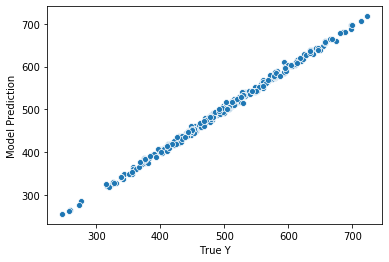

In [66]:
sns.scatterplot('True Y', 'Model Prediction', data=pred)

In [67]:
# Model fits well

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
mean_absolute_error(pred['True Y'], pred['Model Prediction'])

4.3831014971479

In [70]:
mean_squared_error(pred['True Y'], pred['Model Prediction'])

28.94474694745015

In [71]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [72]:
# Model is performing very well since Mean Absolute Error is only 1 % of mean value for Price 

In [76]:
# check new value based on Model
new = [[998, 1000]]

In [79]:
new = mms.transform(new)

In [80]:
model.predict(new)

array([[423.25516]], dtype=float32)

In [81]:
from tensorflow.keras.models import load_model

In [82]:
model.save('keras_model.h5')

In [84]:
loadm = load_model('keras_model.h5')

In [85]:
loadm.predict(new)

array([[423.25516]], dtype=float32)